M2-1
Doesn't include any weather features
includes Forecast , actual demand lag and mean , hour and day of week

Data timespan: 2010-01-01 00:01:24 to 2021-03-17 12:00:56
Total records: 195524
Data frequency: 0 days 00:30:00


,id,period_id,forecast_demand,date_time_current,date_time_future,date_time_current_rounded,total_demand,temperature_future,temperature_current,forecast_interval,demand_lag12h,demand_lag24h,demand_lag168h,hour,day_of_week,month,demand_rolling_mean_24h
7510461,2017100739,24,6824.10,2017-10-07 23:01:35,2017-10-08 11:00:00,2017-10-07 23:00:00,6954.92,21.2,13.3,0 days 12:00:00.000000000,NaN,NaN,NaN,23,5,10,NaN
7510519,2017100740,24,6733.41,2017-10-07 23:31:38,2017-10-08 11:30:00,2017-10-07 23:30:00,6928.97,21.3,12.8,0 days 12:00:00.000000000,NaN,NaN,NaN,23,5,10,NaN
7510576,2017100741,24,6665.92,2017-10-08 00:01:42,2017-10-08 12:00:00,2017-10-08 00:00:00,6963.49,21.2,12.7,0 days 12:00:00.000000000,NaN,NaN,NaN,0,6,10,NaN
7510632,2017100742,24,6638.01,2017-10-08 00:31:40,2017-10-08 12:30:00,2017-10-08 00:30:00,6966.67,21.3,12.6,0 days 12:00:00.000000000,NaN,NaN,NaN,0,6,10,NaN
7510687,2017100743,24,6582.00,2017-10-08 01:01:37,2017-10-08 13:00:00,2017-10-08 01:00:00,6939.97,21.0,12.4,0 days 12:00:00.000000000,NaN,NaN,NaN,1,6,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10853504,2021031713,24,7325.13,2021-03-17 10:01:17,2021-03-17 22:00:00,2021-03-17 10:00:00,7419.77,19.7,21.3,0 days 12:00:00.000000000,7695.32,7373.83,6211.99,10,2,3,7522.112083
10853532,2021031714,24,7271.28,2021-03-17 10:31:09,2021-03-17 22:30:00,2021-03-17 10:30:00,7417.91,19.5,21.6,0 days 12:00:00.000000000,7595.23,7345.78,6409.04,10,2,3,7512.402917
10853559,2021031715,24,7172.65,2021-03-17 11:01:00,2021-03-17 23:00:00,2021-03-17 11:00:00,7287.32,19.1,21.9,0 days 12:00:00.000000000,7537.24,7218.99,6566.17,11,2,3,7273.215625
10853585,2021031716,24,7041.74,2021-03-17 11:31:07,2021-03-17 23:30:00,2021-03-17 11:30:00,7172.39,18.8,21.8,0 days 12:00:00.000000000,7511.38,7056.88,7056.38,11,2,3,7267.357708


NaN values in features: 0
NaN values in target: 0
Index([ 7574338,  7574396,  7574453,  7574509,  7574564,  7574618,  7574671,
        7574723,  7574774,  7574824,
       ...
       10853349, 10853382, 10853414, 10853445, 10853475, 10853504, 10853532,
       10853559, 10853585, 10853610],
      dtype='int64', length=59095)
Feature Importances:
 forecast_demand            0.990142
demand_lag24h              0.003592
demand_rolling_mean_24h    0.001764
demand_lag168h             0.001582
demand_lag12h              0.001457
day_of_week                0.000791
hour                       0.000672
dtype: float64

Model Performance:
- MSE: 54529.85
- MAPE: 2.14%

Original Forecast Performance:
- MSE: 55155.44
- MAPE: 2.17%



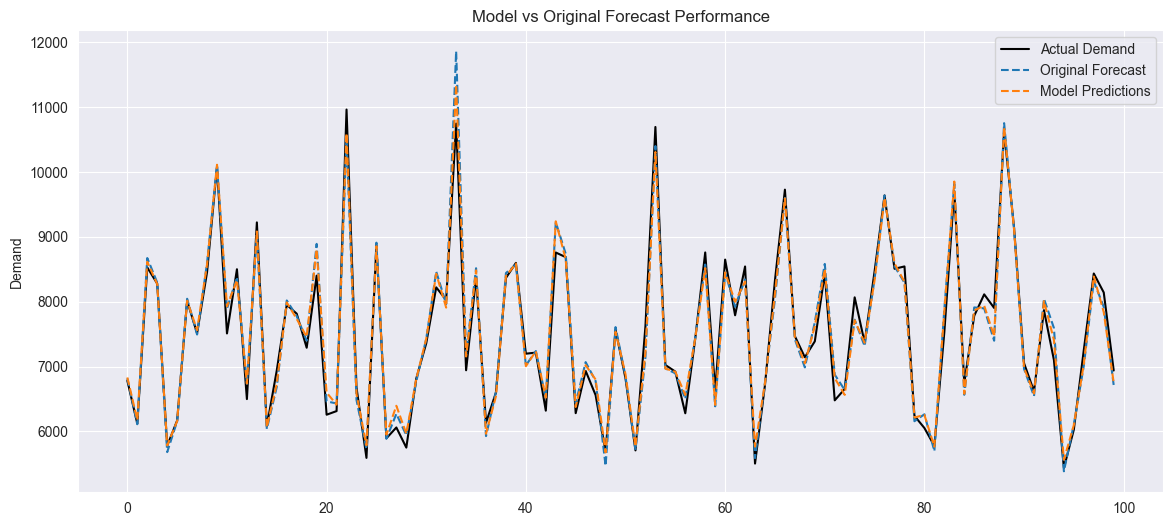

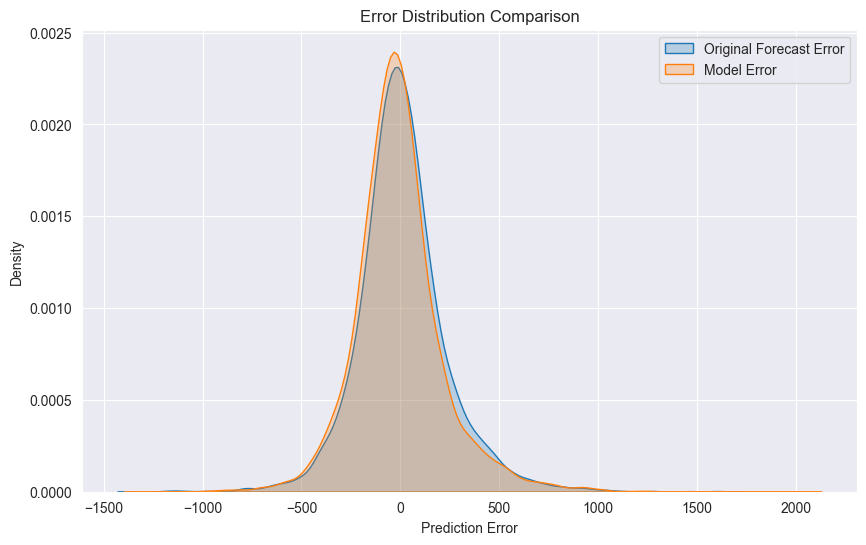

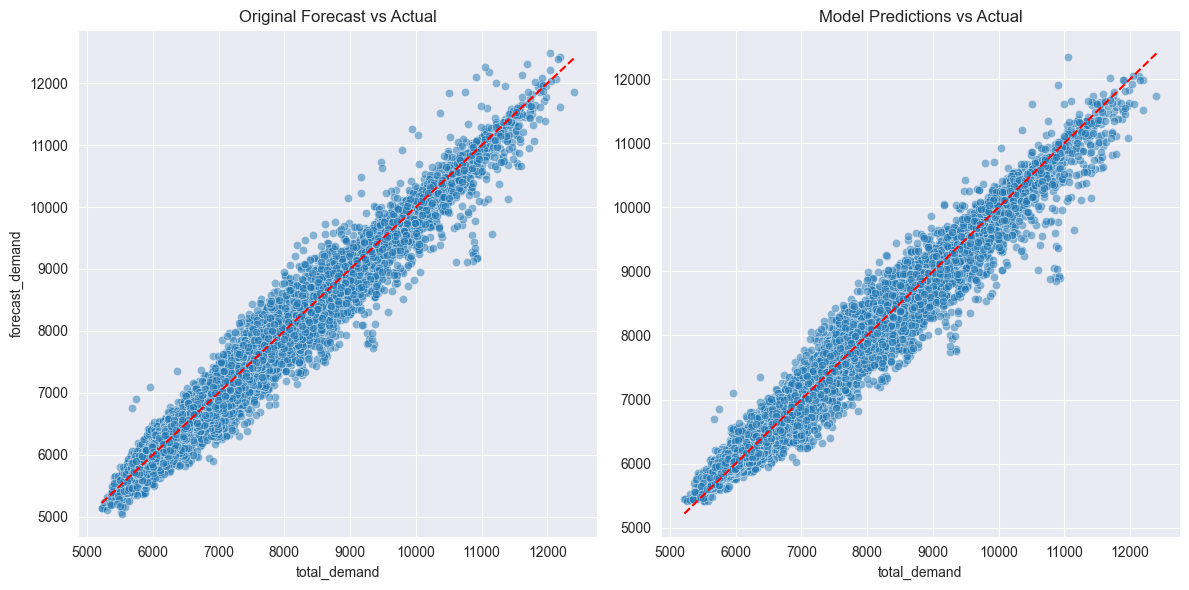


Improvement Over Original Forecast:
- MSE: 1.13%

- MAPE: 1.15%



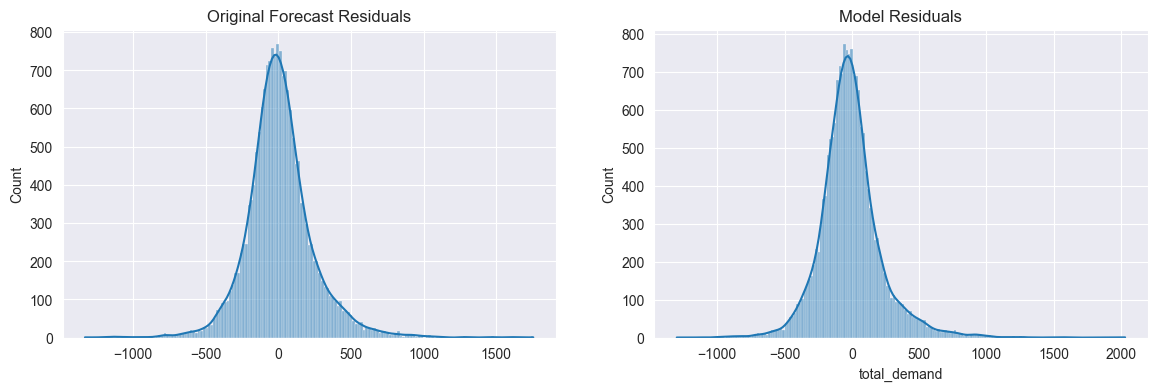

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\waseem\Downloads\combined_data\combined_data.csv"#change path
df = pd.read_csv(file_path)

# Convert to datetime
df["date_time_current"] = pd.to_datetime(df["date_time_current"])
df["date_time_future"] = pd.to_datetime(df["date_time_future"])

# Sort by forecast time
df = df.sort_values("date_time_current")
# filter PERIDID 24
df_periodid24 = df[df["period_id"] == 24].copy()
# Sort data by time
df_periodid24 = df_periodid24.sort_values("date_time_current")

# Print basic dataset information
print(f"Data timespan: {df_periodid24['date_time_current'].min()} to {df_periodid24['date_time_current'].max()}")
print(f"Total records: {len(df_periodid24)}")
print(f"Data frequency: {df_periodid24['date_time_current'].diff().value_counts().index[0]}")

#  slicing the data
start_date = pd.to_datetime('2017-10-07 23:00:00')
end_date = df_periodid24['date_time_current'].max()
date_mask = (df_periodid24['date_time_current'] >= start_date) & (df['date_time_current'] <= end_date)
df_period24 = df.loc[date_mask].copy()

# Create lagged features (12h, 24h, 168h)
df_period24["demand_lag12h"] = df_period24["total_demand"].shift(24)  # 12-hour lag
df_period24["demand_lag24h"] = df_period24["total_demand"].shift(48)  # Daily patterns
df_period24["demand_lag168h"] = df_period24["total_demand"].shift(372)  # Weekly seasonality
df_period24["hour"] = df_period24["date_time_current"].dt.hour
df_period24["day_of_week"] = df_period24["date_time_current"].dt.dayofweek
df_period24["month"] = df_period24["date_time_current"].dt.month
# 24-hour rolling mean demand (excluding current row)
# For each hour, calculate rolling mean on properly lagged data
hour_groups = df_period24.groupby('hour')
for hour, hour_data in hour_groups:
    # Sort by date
    hour_data = hour_data.sort_values('date_time_current')

    # Calculate rolling mean using only data that would be available
    # Shift by 1 since we want to use past values only
    hour_data['demand_rolling_mean_24h'] = hour_data['total_demand'].shift(1).rolling(48).mean()

    # Update the main dataframe
    df_period24.loc[hour_data.index, 'demand_rolling_mean_24h'] = hour_data['demand_rolling_mean_24h']

display(df_period24)


#  Feature Selection

# Define the feature list
features = [
    "forecast_demand",          # Original forecast to be corrected
    "demand_lag12h",            # 12-hour lagged demand
    "demand_lag24h",            # 24-hour lagged demand (daily seasonality)
    "demand_lag168h",           # Weekly seasonality (24*7=168 hours)
    "demand_rolling_mean_24h",  # 24-hour rolling average (recent trend)
    "hour",                     # Hour of day (0-23)
    "day_of_week"               # Day of week
]

# Create cleaned dataset with these features
df_model = df_period24[features + ["total_demand"]+ ['date_time_current']].dropna()  # target is total_demand
# Define target
target = 'total_demand'


# Check for any remaining NaN values
print(f"NaN values in features: {df_model[features].isna().sum().sum()}")
print(f"NaN values in target: {df_model[target].isna().sum()}")
print(df_model.index)
# ===== Split data temporally =====
# Use the last 30% for testing
X = df_model[features]
y = df_model[target]
test_size = 0.3
split_idx = int(len(df_model) * (1 - test_size))

# Split into train/test with proper temporal order

train_mask = df_model.index < split_idx
test_mask = df_model.index >= split_idx

X_train = X.iloc[:split_idx]
y_train = y.iloc[:split_idx]
X_test = X.iloc[split_idx:]
y_test = y.iloc[split_idx:]


# Train Random Forest Model




model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# Get model predictions on test set
y_pred_model = model.predict(X_test)
#  Feature Importance Check




feature_importance = pd.Series(model.feature_importances_, index=features)
print("Feature Importances:\n", feature_importance.sort_values(ascending=False))


# Model Performance
#





# Get original forecast (forecast_demand) from test set
y_pred_original = X_test["forecast_demand"]

# True values
y_true = y_test

# Calculate metrics for MODEL
mse_model = mean_squared_error(y_test, y_pred_model)
mape_model = np.mean(np.abs((y_test - y_pred_model) / y_test)) * 100

# Calculate metrics for ORIGINAL FORECAST
mse_original = mean_squared_error(y_test, y_pred_original)
mape_original = np.mean(np.abs((y_test - y_pred_original) / y_test)) * 100

print(f"""
Model Performance:
- MSE: {mse_model:.2f}
- MAPE: {mape_model:.2f}%

Original Forecast Performance:
- MSE: {mse_original:.2f}
- MAPE: {mape_original:.2f}%
""")

#Plotting


# Plot a sample of 100 data points
sample = np.random.choice(len(y_test), 100, replace=False)
x_axis = range(len(sample))

plt.figure(figsize=(14, 6))
sns.lineplot(x=x_axis, y=y_true.iloc[sample], label='Actual Demand', color='black')
sns.lineplot(x=x_axis, y=y_pred_original.iloc[sample], label='Original Forecast', linestyle='--')
sns.lineplot(x=x_axis, y=y_pred_model[sample], label='Model Predictions', linestyle='--')
plt.title("Model vs Original Forecast Performance")
plt.ylabel("Demand")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(y_true - y_pred_original, label='Original Forecast Error', fill=True)
sns.kdeplot(y_true - y_pred_model, label='Model Error', fill=True)
plt.title("Error Distribution Comparison")
plt.xlabel("Prediction Error")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_true, y=y_pred_original, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title("Original Forecast vs Actual")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_true, y=y_pred_model, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title("Model Predictions vs Actual")
plt.tight_layout()
plt.show()

# Performance Improvement


improvement_mse = (1 - mse_model/mse_original) * 100

improvement_mape = (1 - mape_model/mape_original) * 100

print(f"""
Improvement Over Original Forecast:
- MSE: {improvement_mse:.2f}%

- MAPE: {improvement_mape:.2f}%
""")

# Residuals
residuals_original = y_true - y_pred_original
residuals_model = y_true - y_pred_model

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals_original, kde=True)
plt.title("Original Forecast Residuals")

plt.subplot(1, 2, 2)
sns.histplot(residuals_model, kde=True)
plt.title("Model Residuals")
plt.show()


